# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

1.  Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора) на датасет from sklearn.datasets import load_boston.

-1. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

-2. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

1-2. (*) Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [ ]:
import numpy as np

import pandas as pd

from tqdm import tqdm

import itertools

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error as sklearn_mean_squared_error 
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy, mean_squared_error # <== !!!
from tensorflow.keras.metrics import RootMeanSquaredError, MeanSquaredError

import keras
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

from keras.optimizers import SGD
from keras.optimizers import Adagrad
from keras.optimizers import RMSprop
from keras.optimizers import Adam

# Загрузка данных

In [ ]:
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df['target'] = pd.Series(boston_data.target)
print(df.shape)
df.head()

(506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#print(boston_data.DESCR)
- CRIM     - per capita crime rate by town
- ZN       - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    - proportion of non-retail business acres per town
- CHAS     - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      - nitric oxides concentration (parts per 10 million)
- RM       - average number of rooms per dwelling
- AGE      - proportion of owner-occupied units built prior to 1940
- DIS      - weighted distances to five Boston employment centres
- RAD      - index of accessibility to radial highways
- TAX      - full-value property-tax rate per `$10,000`
- PTRATIO  - pupil-teacher ratio by town
- B        - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    - % lower status of the population
- MEDV     - Median value of owner-occupied homes in $1000's

In [ ]:
X = df.drop(['target'], axis=1)
y = df['target']

In [ ]:
MinMaxSc = MinMaxScaler()
X_scaled = MinMaxSc.fit_transform(X)

# sc = StandardScaler()
# X_scaled = sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state=1)

In [ ]:
# создадим пустой датафрейм
df = pd.DataFrame(columns=['No. layers', 'No. neurons', 'act_func', 'opt', 'train', 'test'])
i = 0

# 2. 3 слоя, 256 нейронов, ReLU, Adam + Early stoping

**EarlyStopping**: прекращение обучения, когда параметр monitor перестает улучшаться.

Аргументы

- `monitor`: параметр для мониторинга
- `min_delta`: минимальное значение изменения величины monitor, расцениваемое как улучшение, то есть, если абсолютное изменение меньше min_delta, то улучшение не засчитывается
- `patience`: число эпох, за которые величина monitor не улучшается, после которых обучение будет остановлено. Проверочные величины могут производиться не после каждой эпохи если validation_freq (model.fit(validation_freq=5)) больше единицы.
- `verbose`: режим отображения, 0 или 1.
- `mode`: один из {auto, min, max}. В режиме min, обучение остановится когда величина monitor перестанет уменьшаться; в режиме max, обучение остановится когда величина monitor перестанет увеличиваться; в режиме auto, mode выбирается в зависимости от имени monitor.
- `baseline`: значение, которое должна достичь величина monitor. Обучение прекратится, если модель не достигла baseline.
- `restore_best_weights`: восстанавливать ли веса модели с эпохи с лучшем значением параметра monitor. Если False, веса модели будут загружены из последней шага обучения.

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=0,
                           patience=100,
                           verbose=1,
                           mode='auto',
                           baseline=None,
                           restore_best_weights=False)

input_layer = Input(shape=(X_train.shape[1],))
dense_layer_1 = Dense(256, activation='relu')(input_layer)
dense_layer_2 = Dense(256, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(256, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

history = model.fit(X_train, y_train, 
                    batch_size=5, 
                    epochs=10, 
                    verbose=0,
                    callbacks=[early_stop],
                    validation_data=(X_test, y_test),
                    #validation_split=0.2
                   )

y_pred_train = model.predict(X_train)
print(np.sqrt(sklearn_mean_squared_error(y_train, y_pred_train)))

y_pred_test = model.predict(X_test)
print(np.sqrt(sklearn_mean_squared_error(y_test, y_pred_test)))

r2_train = round(r2_score(y_train, y_pred_train), 4)
r2_test = round(r2_score(y_test, y_pred_test), 4)

3.958906303685872
3.750382989932957


In [ ]:
n_neurons = [int(i) for i in np.geomspace(51, 1000, num=10, axis=0).tolist()]
n_neurons

[50, 70, 98, 137, 191, 266, 370, 516, 718, 1000]

# batch size

## 3 слоя, 50-100 нейронов, ReLU, Adam, batch size = 10

In [ ]:
# создадим пустой датафрейм
df = pd.DataFrame(columns=['No. layers', 'No. neurons', 'act_func', 'opt', 'train', 'test'])
i = 0

In [ ]:
for n_neuron in tqdm(n_neurons):
    input_layer = Input(shape=(X_train.shape[1],))
    dense_layer_1 = Dense(n_neuron, activation='relu')(input_layer)
    output = Dense(1)(dense_layer_1)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

    history = model.fit(X_train, y_train, 
                        batch_size=10, 
                        epochs=10, 
                        verbose=0,
                        #callbacks=[early_stop],
                        validation_data=(X_test, y_test),
                        #validation_split=0.2
                       )

    y_pred_train = model.predict(X_train)
    #print(np.sqrt(sklearn_mean_squared_error(y_train, y_pred_train)))

    y_pred_test = model.predict(X_test)
    #print(np.sqrt(sklearn_mean_squared_error(y_test, y_pred_test)))

    r2_train = round(r2_score(y_train, y_pred_train), 4)
    r2_test = round(r2_score(y_test, y_pred_test), 4)

    df.loc[i] = [3, n_neuron, 'ReLu', 'Adam', r2_train, r2_test]
    i += 1
df

100%|██████████| 10/10 [00:40<00:00,  4.01s/it]


,No. layers,No. neurons,act_func,opt,train,test
0,3,50,ReLu,Adam,-0.3498,-0.3102
1,3,70,ReLu,Adam,-0.2361,-0.2106
2,3,98,ReLu,Adam,0.1541,0.1524
3,3,137,ReLu,Adam,0.1504,0.1364
4,3,191,ReLu,Adam,0.2836,0.2697
5,3,266,ReLu,Adam,0.3467,0.3453
6,3,370,ReLu,Adam,0.3889,0.4006
7,3,516,ReLu,Adam,0.4088,0.4425
8,3,718,ReLu,Adam,0.4504,0.4892
9,3,1000,ReLu,Adam,0.4889,0.5300


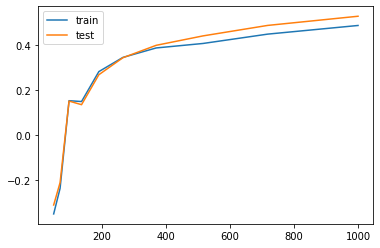

In [ ]:
plt.plot(df['No. neurons'], df['train'], label='train')
plt.plot(df['No. neurons'], df['test'], label='test')
plt.legend();

## 3 слоя, 50-100 нейронов, ReLU, Adam, batch size = 5¶

In [ ]:
# создадим пустой датафрейм
df = pd.DataFrame(columns=['No. layers', 'No. neurons', 'act_func', 'opt', 'train', 'test'])
i = 0

In [ ]:
for n_neuron in tqdm(n_neurons):
    input_layer = Input(shape=(X_train.shape[1],))
    dense_layer_1 = Dense(n_neuron, activation='relu')(input_layer)
    output = Dense(1)(dense_layer_1)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

    history = model.fit(X_train, y_train, 
                        batch_size=5, 
                        epochs=10, 
                        verbose=0,
                        #callbacks=[early_stop],
                        validation_data=(X_test, y_test),
                        #validation_split=0.2
                       )

    y_pred_train = model.predict(X_train)
    #print(np.sqrt(sklearn_mean_squared_error(y_train, y_pred_train)))

    y_pred_test = model.predict(X_test)
    #print(np.sqrt(sklearn_mean_squared_error(y_test, y_pred_test)))

    r2_train = round(r2_score(y_train, y_pred_train), 4)
    r2_test = round(r2_score(y_test, y_pred_test), 4)

    df.loc[i] = [3, n_neuron, 'ReLu', 'Adam', r2_train, r2_test]
    i += 1
df

100%|██████████| 10/10 [00:40<00:00,  4.04s/it]


,No. layers,No. neurons,act_func,opt,train,test
0,3,50,ReLu,Adam,0.2691,0.2521
1,3,70,ReLu,Adam,0.3303,0.3291
2,3,98,ReLu,Adam,0.3860,0.3995
3,3,137,ReLu,Adam,0.4412,0.4661
4,3,191,ReLu,Adam,0.4629,0.4811
5,3,266,ReLu,Adam,0.5123,0.5468
6,3,370,ReLu,Adam,0.5557,0.6042
7,3,516,ReLu,Adam,0.5779,0.6216
8,3,718,ReLu,Adam,0.6141,0.6789
9,3,1000,ReLu,Adam,0.6588,0.7252


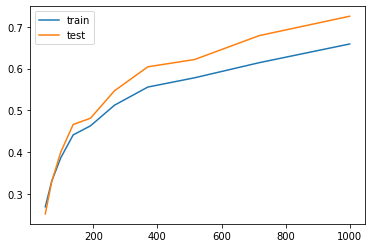

In [ ]:
plt.plot(df['No. neurons'], df['train'], label='train')
plt.plot(df['No. neurons'], df['test'], label='test')
plt.legend();

## 3 слоя, 50-100 нейронов, ReLU, Adam, batch size = 1

In [ ]:
# создадим пустой датафрейм
df = pd.DataFrame(columns=['No. layers', 'No. neurons', 'act_func', 'opt', 'train', 'test'])
i = 0

In [ ]:
for n_neuron in tqdm(n_neurons):
    input_layer = Input(shape=(X_train.shape[1],))
    dense_layer_1 = Dense(n_neuron, activation='relu')(input_layer)
    output = Dense(1)(dense_layer_1)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

    history = model.fit(X_train, y_train, 
                        batch_size=1, 
                        epochs=10, 
                        verbose=0,
                        #callbacks=[early_stop],
                        validation_data=(X_test, y_test),
                        #validation_split=0.2
                       )

    y_pred_train = model.predict(X_train)
    #print(np.sqrt(sklearn_mean_squared_error(y_train, y_pred_train)))

    y_pred_test = model.predict(X_test)
    #print(np.sqrt(sklearn_mean_squared_error(y_test, y_pred_test)))

    r2_train = round(r2_score(y_train, y_pred_train), 4)
    r2_test = round(r2_score(y_test, y_pred_test), 4)

    df.loc[i] = [3, n_neuron, 'ReLu', 'Adam', r2_train, r2_test]
    i += 1
df

100%|██████████| 10/10 [02:10<00:00, 13.10s/it]


,No. layers,No. neurons,act_func,opt,train,test
0,3,50,ReLu,Adam,0.5798,0.6194
1,3,70,ReLu,Adam,0.6227,0.6805
2,3,98,ReLu,Adam,0.6257,0.6954
3,3,137,ReLu,Adam,0.6684,0.7437
4,3,191,ReLu,Adam,0.6844,0.7667
5,3,266,ReLu,Adam,0.6926,0.7851
6,3,370,ReLu,Adam,0.6897,0.7773
7,3,516,ReLu,Adam,0.7077,0.8079
8,3,718,ReLu,Adam,0.7353,0.8272
9,3,1000,ReLu,Adam,0.7368,0.8256


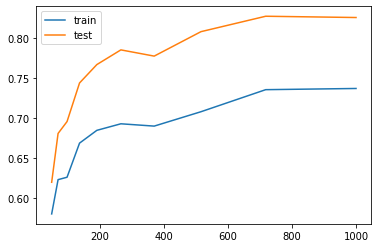

In [ ]:
plt.plot(df['No. neurons'], df['train'], label='train')
plt.plot(df['No. neurons'], df['test'], label='test')
plt.legend();

## Вывод:

Уменьшение батча ускоряет обучение модели.

Дальше будем обучать модели с batch_size = 1

# Количество слоев

## 3 слоя, 50-100 нейронов, ReLU, Adam

In [ ]:
# создадим пустой датафрейм
df = pd.DataFrame(columns=['No. layers', 'No. neurons', 'act_func', 'opt', 'train', 'test'])
i = 0

In [ ]:
for n_neuron in tqdm(n_neurons):
    input_layer = Input(shape=(X_train.shape[1],))
    dense_layer_1 = Dense(n_neuron, activation='relu')(input_layer)
    output = Dense(1)(dense_layer_1)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

    history = model.fit(X_train, y_train, 
                        batch_size=1, 
                        epochs=10, 
                        verbose=0,
                        #callbacks=[early_stop],
                        validation_data=(X_test, y_test),
                        #validation_split=0.2
                       )

    y_pred_train = model.predict(X_train)
    #print(np.sqrt(sklearn_mean_squared_error(y_train, y_pred_train)))

    y_pred_test = model.predict(X_test)
    #print(np.sqrt(sklearn_mean_squared_error(y_test, y_pred_test)))

    r2_train = round(r2_score(y_train, y_pred_train), 4)
    r2_test = round(r2_score(y_test, y_pred_test), 4)

    df.loc[i] = [3, n_neuron, 'ReLu', 'Adam', r2_train, r2_test]
    i += 1
df

100%|██████████| 10/10 [02:39<00:00, 15.95s/it]


,No. layers,No. neurons,act_func,opt,train,test
0,3,50,ReLu,Adam,0.5642,0.6111
1,3,70,ReLu,Adam,0.6026,0.6621
2,3,98,ReLu,Adam,0.6347,0.7044
3,3,137,ReLu,Adam,0.6577,0.7428
4,3,191,ReLu,Adam,0.6371,0.7324
5,3,266,ReLu,Adam,0.7019,0.7913
6,3,370,ReLu,Adam,0.7000,0.7911
7,3,516,ReLu,Adam,0.7289,0.8177
8,3,718,ReLu,Adam,0.7277,0.8116
9,3,1000,ReLu,Adam,0.7445,0.8403


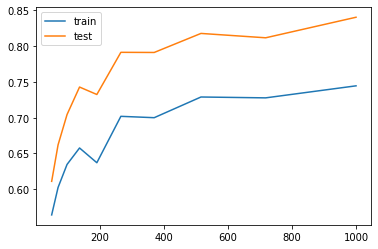

In [ ]:
plt.plot(df['No. neurons'], df['train'], label='train')
plt.plot(df['No. neurons'], df['test'], label='test')
plt.legend();

## 4 слоя, 50-100 нейронов, ReLU, Adam

In [ ]:
# создадим пустой датафрейм
df = pd.DataFrame(columns=['No. layers', 'No. neurons', 'act_func', 'opt', 'train', 'test'])
i = 0

In [ ]:
for n_neuron in tqdm(n_neurons):
    input_layer = Input(shape=(X_train.shape[1],))
    dense_layer_1 = Dense(n_neuron, activation='relu')(input_layer)
    dense_layer_2 = Dense(n_neuron, activation='relu')(dense_layer_1)
    output = Dense(1)(dense_layer_2)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

    history = model.fit(X_train, y_train, 
                        batch_size=1, 
                        epochs=10, 
                        verbose=0,
                        #callbacks=[early_stop],
                        validation_data=(X_test, y_test),
                        #validation_split=0.2
                       )

    y_pred_train = model.predict(X_train)
    #print(np.sqrt(sklearn_mean_squared_error(y_train, y_pred_train)))

    y_pred_test = model.predict(X_test)
    #print(np.sqrt(sklearn_mean_squared_error(y_test, y_pred_test)))

    r2_train = round(r2_score(y_train, y_pred_train), 4)
    r2_test = round(r2_score(y_test, y_pred_test), 4)

    df.loc[i] = [4, n_neuron, 'ReLu', 'Adam', r2_train, r2_test]
    i += 1
df

100%|██████████| 10/10 [02:52<00:00, 17.30s/it]


,No. layers,No. neurons,act_func,opt,train,test
0,4,50,ReLu,Adam,0.7357,0.8222
1,4,70,ReLu,Adam,0.7651,0.8616
2,4,98,ReLu,Adam,0.7546,0.8396
3,4,137,ReLu,Adam,0.7141,0.7905
4,4,191,ReLu,Adam,0.7167,0.8030
5,4,266,ReLu,Adam,0.8296,0.8856
6,4,370,ReLu,Adam,0.8071,0.8566
7,4,516,ReLu,Adam,0.8306,0.8866
8,4,718,ReLu,Adam,0.8224,0.8636
9,4,1000,ReLu,Adam,0.8466,0.8959


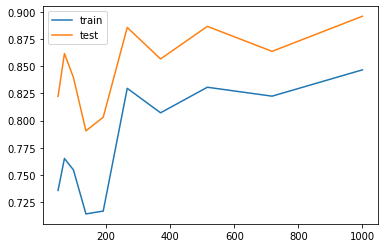

In [ ]:
plt.plot(df['No. neurons'], df['train'], label='train')
plt.plot(df['No. neurons'], df['test'], label='test')
plt.legend();

## 5 слоев, 50-100 нейронов, ReLU, Adam

In [ ]:
# создадим пустой датафрейм
df = pd.DataFrame(columns=['No. layers', 'No. neurons', 'act_func', 'opt', 'train', 'test'])
i = 0

In [ ]:
for n_neuron in tqdm(n_neurons):
    input_layer = Input(shape=(X_train.shape[1],))
    dense_layer_1 = Dense(n_neuron, activation='relu')(input_layer)
    dense_layer_2 = Dense(n_neuron, activation='relu')(dense_layer_1)
    dense_layer_3 = Dense(n_neuron, activation='relu')(dense_layer_2)
    output = Dense(1)(dense_layer_3)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

    history = model.fit(X_train, y_train, 
                        batch_size=1, 
                        epochs=10, 
                        verbose=0,
                        #callbacks=[early_stop],
                        validation_data=(X_test, y_test),
                        #validation_split=0.2
                       )

    y_pred_train = model.predict(X_train)
    #print(np.sqrt(sklearn_mean_squared_error(y_train, y_pred_train)))

    y_pred_test = model.predict(X_test)
    #print(np.sqrt(sklearn_mean_squared_error(y_test, y_pred_test)))

    r2_train = round(r2_score(y_train, y_pred_train), 4)
    r2_test = round(r2_score(y_test, y_pred_test), 4)

    df.loc[i] = [5, n_neuron, 'ReLu', 'Adam', r2_train, r2_test]
    i += 1
df

100%|██████████| 10/10 [02:40<00:00, 16.04s/it]


,No. layers,No. neurons,act_func,opt,train,test
0,5,50,ReLu,Adam,0.7892,0.8652
1,5,70,ReLu,Adam,0.7743,0.8540
2,5,98,ReLu,Adam,0.7556,0.8310
3,5,137,ReLu,Adam,0.8264,0.8838
4,5,191,ReLu,Adam,0.8616,0.8955
5,5,266,ReLu,Adam,0.8683,0.9029
6,5,370,ReLu,Adam,0.8537,0.8814
7,5,516,ReLu,Adam,0.7863,0.8153
8,5,718,ReLu,Adam,0.8702,0.8911
9,5,1000,ReLu,Adam,0.8035,0.8461


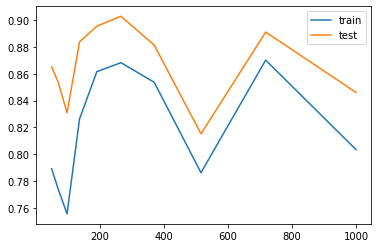

In [ ]:
plt.plot(df['No. neurons'], df['train'], label='train')
plt.plot(df['No. neurons'], df['test'], label='test')
plt.legend();

## 6 слоев, 50-100 нейронов, ReLU, Adam

In [ ]:
# создадим пустой датафрейм
df = pd.DataFrame(columns=['No. layers', 'No. neurons', 'act_func', 'opt', 'train', 'test'])
i = 0

In [ ]:
for n_neuron in tqdm(n_neurons, leave=False):
    input_layer = Input(shape=(X_train.shape[1],))
    dense_layer_1 = Dense(n_neuron, activation='relu')(input_layer)
    dense_layer_2 = Dense(n_neuron, activation='relu')(dense_layer_1)
    dense_layer_3 = Dense(n_neuron, activation='relu')(dense_layer_2)
    dense_layer_4 = Dense(n_neuron, activation='relu')(dense_layer_3)
    output = Dense(1)(dense_layer_4)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

    history = model.fit(X_train, y_train, 
                        batch_size=1, 
                        epochs=10, 
                        verbose=0,
                        #callbacks=[early_stop],
                        validation_data=(X_test, y_test),
                        #validation_split=0.2
                       )

    y_pred_train = model.predict(X_train)
    #print(np.sqrt(sklearn_mean_squared_error(y_train, y_pred_train)))

    y_pred_test = model.predict(X_test)
    #print(np.sqrt(sklearn_mean_squared_error(y_test, y_pred_test)))

    r2_train = round(r2_score(y_train, y_pred_train), 4)
    r2_test = round(r2_score(y_test, y_pred_test), 4)

    df.loc[i] = [6, n_neuron, 'ReLu', 'Adam', r2_train, r2_test]
    i += 1
df

,No. layers,No. neurons,act_func,opt,train,test
0,6,50,ReLu,Adam,0.8060,0.8573
1,6,70,ReLu,Adam,0.7730,0.8515
2,6,98,ReLu,Adam,0.8359,0.8921
3,6,137,ReLu,Adam,0.8462,0.8815
4,6,191,ReLu,Adam,0.8518,0.8834
5,6,266,ReLu,Adam,0.8428,0.8908
6,6,370,ReLu,Adam,0.8460,0.8724
7,6,516,ReLu,Adam,0.8073,0.8386
8,6,718,ReLu,Adam,0.7671,0.8218
9,6,1000,ReLu,Adam,0.8359,0.8792


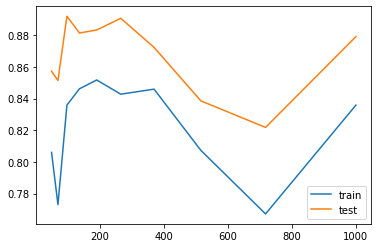

In [ ]:
plt.plot(df['No. neurons'], df['train'], label='train')
plt.plot(df['No. neurons'], df['test'], label='test')
plt.legend();

## 7 слоев, 50-100 нейронов, ReLU, Adam

In [ ]:
# создадим пустой датафрейм
df = pd.DataFrame(columns=['No. layers', 'No. neurons', 'act_func', 'opt', 'train', 'test'])
i = 0

In [ ]:
for n_neuron in tqdm(n_neurons):
    input_layer = Input(shape=(X_train.shape[1],))
    dense_layer_1 = Dense(n_neuron, activation='relu')(input_layer)
    dense_layer_2 = Dense(n_neuron, activation='relu')(dense_layer_1)
    dense_layer_3 = Dense(n_neuron, activation='relu')(dense_layer_2)
    dense_layer_4 = Dense(n_neuron, activation='relu')(dense_layer_3)
    dense_layer_5 = Dense(n_neuron, activation='relu')(dense_layer_4)
    output = Dense(1)(dense_layer_5)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

    history = model.fit(X_train, y_train, 
                        batch_size=1, 
                        epochs=10, 
                        verbose=0,
                        #callbacks=[early_stop],
                        validation_data=(X_test, y_test),
                        #validation_split=0.2
                       )

    y_pred_train = model.predict(X_train)
    #print(np.sqrt(sklearn_mean_squared_error(y_train, y_pred_train)))

    y_pred_test = model.predict(X_test)
    #print(np.sqrt(sklearn_mean_squared_error(y_test, y_pred_test)))

    r2_train = round(r2_score(y_train, y_pred_train), 4)
    r2_test = round(r2_score(y_test, y_pred_test), 4)

    df.loc[i] = [7, n_neuron, 'ReLu', 'Adam', r2_train, r2_test]
    i += 1
df

100%|██████████| 10/10 [02:51<00:00, 17.12s/it]


,No. layers,No. neurons,act_func,opt,train,test
0,7,50,ReLu,Adam,0.8587,0.8995
1,7,70,ReLu,Adam,0.8462,0.9011
2,7,98,ReLu,Adam,0.8566,0.8977
3,7,137,ReLu,Adam,0.7150,0.7632
4,7,191,ReLu,Adam,0.8701,0.9137
5,7,266,ReLu,Adam,0.8368,0.8888
6,7,370,ReLu,Adam,0.8598,0.8956
7,7,516,ReLu,Adam,0.8518,0.8966
8,7,718,ReLu,Adam,0.8705,0.9084
9,7,1000,ReLu,Adam,0.6128,0.6538


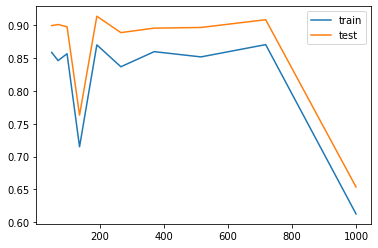

In [ ]:
plt.plot(df['No. neurons'], df['train'], label='train')
plt.plot(df['No. neurons'], df['test'], label='test')
plt.legend();

## 9 слоев, 50-100 нейронов, ReLU, Adam

In [ ]:
# создадим пустой датафрейм
df = pd.DataFrame(columns=['No. layers', 'No. neurons', 'act_func', 'opt', 'train', 'test'])
i = 0

In [ ]:
for n_neuron in tqdm(n_neurons):
    input_layer = Input(shape=(X_train.shape[1],))
    dense_layer_1 = Dense(n_neuron, activation='relu')(input_layer)
    dense_layer_2 = Dense(n_neuron, activation='relu')(dense_layer_1)
    dense_layer_3 = Dense(n_neuron, activation='relu')(dense_layer_2)
    dense_layer_4 = Dense(n_neuron, activation='relu')(dense_layer_3)
    dense_layer_5 = Dense(n_neuron, activation='relu')(dense_layer_4)
    dense_layer_6 = Dense(n_neuron, activation='relu')(dense_layer_5)
    dense_layer_7 = Dense(n_neuron, activation='relu')(dense_layer_6)
    output = Dense(1)(dense_layer_7)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

    history = model.fit(X_train, y_train, 
                        batch_size=1, 
                        epochs=10, 
                        verbose=0,
                        #callbacks=[early_stop],
                        validation_data=(X_test, y_test),
                        #validation_split=0.2
                       )

    y_pred_train = model.predict(X_train)
    #print(np.sqrt(sklearn_mean_squared_error(y_train, y_pred_train)))

    y_pred_test = model.predict(X_test)
    #print(np.sqrt(sklearn_mean_squared_error(y_test, y_pred_test)))

    r2_train = round(r2_score(y_train, y_pred_train), 4)
    r2_test = round(r2_score(y_test, y_pred_test), 4)

    df.loc[i] = [9, n_neuron, 'ReLu', 'Adam', r2_train, r2_test]
    i += 1
df

100%|██████████| 10/10 [03:06<00:00, 18.61s/it]


,No. layers,No. neurons,act_func,opt,train,test
0,9,50,ReLu,Adam,0.8285,0.8934
1,9,70,ReLu,Adam,0.8488,0.8901
2,9,98,ReLu,Adam,0.7662,0.8083
3,9,137,ReLu,Adam,0.7966,0.8523
4,9,191,ReLu,Adam,0.7781,0.8344
5,9,266,ReLu,Adam,0.5287,0.5335
6,9,370,ReLu,Adam,0.7293,0.7447
7,9,516,ReLu,Adam,0.8399,0.8821
8,9,718,ReLu,Adam,0.8267,0.8903
9,9,1000,ReLu,Adam,0.7198,0.7633


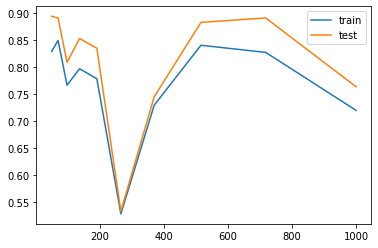

In [ ]:
plt.plot(df['No. neurons'], df['train'], label='train')
plt.plot(df['No. neurons'], df['test'], label='test')
plt.legend();

## Вывод:

Оптимальное количество слоев- 4. При 3-ех модель недообучается. Начиная с 5-ти метрики начинают снижаться и обучение становится нестабильным.

Возмем модель с 4-мя слоями и батчем = 1 и наилучшим количеством нейронов для этой комбинации равным 400.

# Финальная модель

4 слоя, батч = 1

In [ ]:
# создадим пустой датафрейм
df = pd.DataFrame(columns=['No. layers', 'epoches', 'act_func', 'opt', 'train', 'test'])
i = 0

In [ ]:
for epoch in tqdm([10, 50, 100, 200, 500]):
    input_layer = Input(shape=(X_train.shape[1],))
    dense_layer_1 = Dense(400, activation='relu')(input_layer)
    dense_layer_2 = Dense(400, activation='relu')(dense_layer_1)
    output = Dense(1)(dense_layer_2)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

    history = model.fit(X_train, y_train, 
                        batch_size=1, 
                        epochs=epoch, 
                        verbose=0,
                        #callbacks=[early_stop],
                        validation_data=(X_test, y_test),
                        #validation_split=0.2
                       )

    y_pred_train = model.predict(X_train)
    #print(np.sqrt(sklearn_mean_squared_error(y_train, y_pred_train)))

    y_pred_test = model.predict(X_test)
    #print(np.sqrt(sklearn_mean_squared_error(y_test, y_pred_test)))

    r2_train = round(r2_score(y_train, y_pred_train), 4)
    r2_test = round(r2_score(y_test, y_pred_test), 4)

    df.loc[i] = [4, epoch, 'ReLu', 'Adam', r2_train, r2_test]
    i += 1
df

100%|██████████| 5/5 [16:32<00:00, 198.46s/it]


,No. layers,epoches,act_func,opt,train,test
0,4,10,ReLu,Adam,0.7668,0.8352
1,4,50,ReLu,Adam,0.9338,0.9068
2,4,100,ReLu,Adam,0.9474,0.9103
3,4,200,ReLu,Adam,0.9503,0.9134
4,4,500,ReLu,Adam,0.9821,0.9101


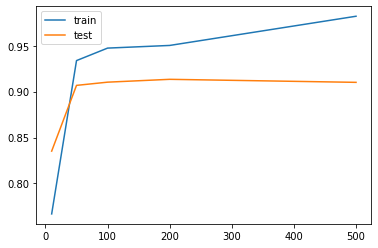

In [ ]:
plt.plot(df['epoches'], df['train'], label='train')
plt.plot(df['epoches'], df['test'], label='test')
plt.legend();

## Вывод:

Количество эпох не должно быть большим. 
Рост эпох увеличивает переобученность модели.

Получить наилучшую модель позволило нахождение оптимальных параметров для:
- батча;
- числа эпох;
- числа слоев.

**В итоге лучшая модель с наибольшими скорами и без переобучения для этого датасета: 4 слоя, 1 батч и 50 эпох**.

Подбор наилучшего оптимизатора не производился, так как почти всегда лучшие результаты показывает Adam.